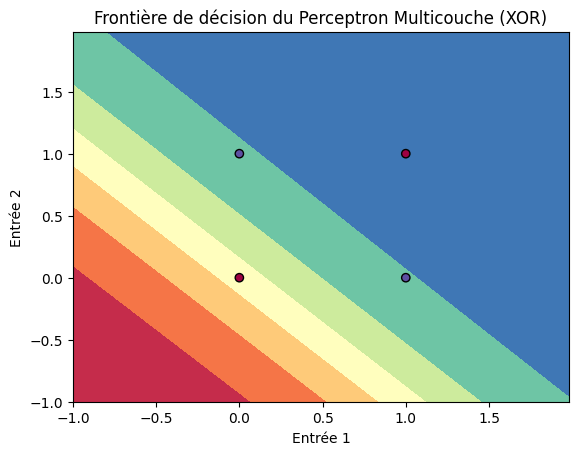

In [3]:
#aliomoulymahamat@gmail.com
#Mouly_Alio


import numpy as np
import matplotlib.pyplot as plt

class PerceptronMulticouche:
    """
    Une implémentation d'un perceptron multicouche.
    """

    def __init__(self, couches, fonction_activation='sigmoid', fonction_derivee=None, taux_apprentissage=0.1, iterations=1000):
        """
        Initialise le perceptron multicouche.
        """
        self.couches = couches
        self.taux_apprentissage = taux_apprentissage
        self.iterations = iterations
        
        self.poids = [np.random.randn(couches[i], couches[i+1]) for i in range(len(couches) - 1)]
        self.biais = [np.random.randn(1, couches[i+1]) for i in range(len(couches) - 1)]
        
        if fonction_activation == 'sigmoid':
            self.fonction_activation = self._sigmoid
            self.fonction_derivee = self._sigmoid_derivee if fonction_derivee is None else fonction_derivee
        else:
            raise ValueError("Fonction d'activation non supportée.")

    def _sigmoid(self, x):
        """
        Calcule la fonction sigmoïde.
        """
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivee(self, x):
        """
        Calcule la dérivée de la fonction sigmoïde.
        """
        return x * (1 - x)

    def propagation_avant(self, x):
        """
        Effectue la propagation avant à travers le réseau.
        """
        activations = [x]
        for i in range(len(self.poids)):
            z = np.dot(activations[-1], self.poids[i]) + self.biais[i]
            a = self.fonction_activation(z)
            activations.append(a)
        return activations

    def retropropagation(self, activations, y):
        """
        Effectue la rétropropagation de l'erreur.
        """
        erreur = y - activations[-1]
        deltas = [erreur * self.fonction_derivee(activations[-1])]
        
        for i in range(len(self.couches) - 2, 0, -1):
            erreur = np.dot(deltas[-1], self.poids[i].T)
            delta = erreur * self.fonction_derivee(activations[i])
            deltas.append(delta)
        deltas.reverse()
        
        for i in range(len(self.poids)):
            self.poids[i] += self.taux_apprentissage * np.dot(activations[i].T, deltas[i])
            self.biais[i] += self.taux_apprentissage * np.sum(deltas[i], axis=0, keepdims=True)

    def entrainer(self, X, y):
        """
        Entraîne le perceptron multicouche.
        """
        for _ in range(self.iterations):
            activations = self.propagation_avant(X)
            self.retropropagation(activations, y)

    def predire(self, x):
        """
        Effectue une prédiction.
        """
        return self.propagation_avant(x)[-1]

# Données d'entraînement (XOR) - Correctement indenté
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Créer et entraîner le réseau
reseau = PerceptronMulticouche(couches=[2, 3, 1], taux_apprentissage=0.1, iterations=1000)
reseau.entrainer(X, y)

# Créer une grille pour la visualisation
h = 0.02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédictions sur la grille
Z = reseau.predire(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage du graphique
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral, edgecolors='black')
plt.xlabel("Entrée 1")
plt.ylabel("Entrée 2")
plt.title("Frontière de décision du Perceptron Multicouche (XOR)")
plt.show()

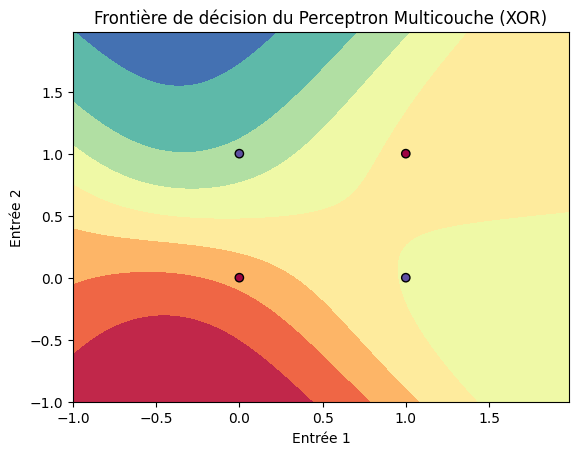

In [6]:

#aliomoulymahamat@gmail.com
#Mouly_Alio


import numpy as np
import matplotlib.pyplot as plt

class PerceptronMulticouche:
    """
    Une implémentation d'un perceptron multicouche.
    """

    def __init__(self, couches, fonction_activation='sigmoid', fonction_derivee=None, taux_apprentissage=0.1, iterations=1000):
        """
        Initialise le perceptron multicouche.
        """
        self.couches = couches
        self.taux_apprentissage = taux_apprentissage
        self.iterations = iterations
        
        self.poids = [np.random.randn(couches[i], couches[i+1]) for i in range(len(couches) - 1)]
        self.biais = [np.random.randn(1, couches[i+1]) for i in range(len(couches) - 1)]
        
        if fonction_activation == 'sigmoid':
            self.fonction_activation = self._sigmoid
            self.fonction_derivee = self._sigmoid_derivee if fonction_derivee is None else fonction_derivee
        else:
            raise ValueError("Fonction d'activation non supportée.")

    def _sigmoid(self, x):
        """
        Calcule la fonction sigmoïde.
        """
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivee(self, x):
        """
        Calcule la dérivée de la fonction sigmoïde.
        """
        return x * (1 - x)

    def propagation_avant(self, x):
        """
        Effectue la propagation avant à travers le réseau.
        """
        activations = [x]
        for i in range(len(self.poids)):
            z = np.dot(activations[-1], self.poids[i]) + self.biais[i]
            a = self.fonction_activation(z)
            activations.append(a)
        return activations

    def retropropagation(self, activations, y):
        """
        Effectue la rétropropagation de l'erreur.
        """
        erreur = y - activations[-1]
        deltas = [erreur * self.fonction_derivee(activations[-1])]
        
        for i in range(len(self.couches) - 2, 0, -1):
            erreur = np.dot(deltas[-1], self.poids[i].T)
            delta = erreur * self.fonction_derivee(activations[i])
            deltas.append(delta)
        deltas.reverse()
        
        for i in range(len(self.poids)):
            self.poids[i] += self.taux_apprentissage * np.dot(activations[i].T, deltas[i])
            self.biais[i] += self.taux_apprentissage * np.sum(deltas[i], axis=0, keepdims=True)

    def entrainer(self, X, y):
        """
        Entraîne le perceptron multicouche.
        """
        for _ in range(self.iterations):
            activations = self.propagation_avant(X)
            self.retropropagation(activations, y)

    def predire(self, x):
        """
        Effectue une prédiction.
        """
        return self.propagation_avant(x)[-1]

# Données d'entraînement (XOR) - Correctement indenté
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Créer et entraîner le réseau
reseau = PerceptronMulticouche(couches=[2, 3, 1], taux_apprentissage=0.1, iterations=1000)
reseau.entrainer(X, y)

# Créer une grille pour la visualisation
h = 0.02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédictions sur la grille
Z = reseau.predire(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage du graphique
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral, edgecolors='black')
plt.xlabel("Entrée 1")
plt.ylabel("Entrée 2")
plt.title("Frontière de décision du Perceptron Multicouche (XOR)")
plt.show()

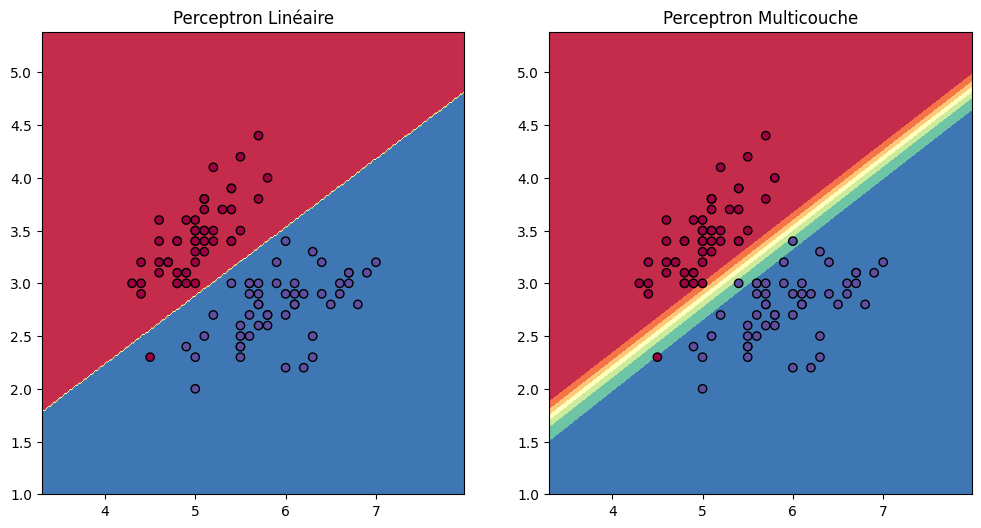

In [7]:
#aliomoulymahamat@gmail.com
#Mouly_Alio

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def step_function(x):
    return np.where(x >= 0, 1, 0)

class PerceptronLineaire:
    def __init__(self, taux_apprentissage=0.1, iterations=100):
        self.taux_apprentissage = taux_apprentissage
        self.iterations = iterations
        self.poids = None
        self.biais = None

    def entrainer(self, X, y):
        n_echantillons, n_caracteristiques = X.shape
        self.poids = np.zeros(n_caracteristiques)
        self.biais = 0

        for _ in range(self.iterations):
            for i in range(n_echantillons):
                prediction = self.predire(X[i])
                mise_a_jour = self.taux_apprentissage * (y[i] - prediction)
                self.poids += mise_a_jour * X[i]
                self.biais += mise_a_jour

    def predire(self, X):
        return step_function(np.dot(X, self.poids) + self.biais)

class PerceptronMulticouche:
    def __init__(self, couches, fonction_activation='sigmoid', fonction_derivee=None, taux_apprentissage=0.1, iterations=1000):
        self.couches = couches
        self.taux_apprentissage = taux_apprentissage
        self.iterations = iterations

        self.poids = [np.random.randn(couches[i], couches[i + 1]) for i in range(len(couches) - 1)]
        self.biais = [np.random.randn(1, couches[i + 1]) for i in range(len(couches) - 1)]

        if fonction_activation == 'sigmoid':
            self.fonction_activation = self._sigmoid
            self.fonction_derivee = self._sigmoid_derivee if fonction_derivee is None else fonction_derivee
        else:
            raise ValueError("Fonction d'activation non supportée.")

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivee(self, x):
        return x * (1 - x)

    def propagation_avant(self, x):
        activations = [x]
        for i in range(len(self.poids)):
            z = np.dot(activations[-1], self.poids[i]) + self.biais[i]
            a = self.fonction_activation(z)
            activations.append(a)
        return activations

    def retropropagation(self, activations, y):
        erreur = y - activations[-1]
        deltas = [erreur * self.fonction_derivee(activations[-1])]

        for i in range(len(self.couches) - 2, 0, -1):
            erreur = np.dot(deltas[-1], self.poids[i].T)
            delta = erreur * self.fonction_derivee(activations[i])
            deltas.append(delta)
        deltas.reverse()

        for i in range(len(self.poids)):
            self.poids[i] += self.taux_apprentissage * np.dot(activations[i].T, deltas[i])
            self.biais[i] += self.taux_apprentissage * np.sum(deltas[i], axis=0, keepdims=True)

    def entrainer(self, X, y):
        for _ in range(self.iterations):
            activations = self.propagation_avant(X)
            self.retropropagation(activations, y)

    def predire(self, x):
        return self.propagation_avant(x)[-1]


# Charger le dataset des iris (seulement 2 classes et 2 caractéristiques pour la visualisation)
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le perceptron linéaire
perceptron_lineaire = PerceptronLineaire()
perceptron_lineaire.entrainer(X_train, y_train)

# Entraîner le perceptron multicouche
perceptron_multicouche = PerceptronMulticouche(couches=[2, 3, 1], taux_apprentissage=0.1, iterations=1000)
perceptron_multicouche.entrainer(X_train.reshape(-1, 2), y_train.reshape(-1, 1))

# Créer la grille pour la visualisation
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédictions pour le graphique
Z_lineaire = perceptron_lineaire.predire(np.c_[xx.ravel(), yy.ravel()])
Z_lineaire = Z_lineaire.reshape(xx.shape)

Z_multicouche = perceptron_multicouche.predire(np.c_[xx.ravel(), yy.ravel()])
Z_multicouche = Z_multicouche.reshape(xx.shape)

# Affichage des graphiques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_lineaire, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
plt.title("Perceptron Linéaire")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_multicouche, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
plt.title("Perceptron Multicouche")

plt.show()